In [6]:
import re
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
tweets = pd.read_csv('D:/tweets.csv',encoding='ISO-8859-1',parse_dates=['created'], header=0,)





In [7]:
tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:00,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:00,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:00,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:00,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:00,False,NaN,8.014950e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize

sid = SentimentIntensityAnalyzer()

tweets['sentiment_compound_polarity']=tweets.text.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,...,statusSource,screenName,retweetCount,isRetweet,retweeted,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:00,False,NaN,8.014960e+17,...,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,0.1027,0.783,0.1,0.117,POSITIVE
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:00,False,NaN,8.014960e+17,...,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False,0.0000,1.000,0.0,0.000,NEUTRAL
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:00,False,NaN,8.014960e+17,...,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,0.0000,1.000,0.0,0.000,NEUTRAL
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:00,False,NaN,8.014960e+17,...,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False,0.0000,1.000,0.0,0.000,NEUTRAL
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:00,False,NaN,8.014950e+17,...,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False,0.0000,1.000,0.0,0.000,NEUTRAL


# 1  Percentage of tweets is negative, positive or neutral?

Text(0.5,1,'Sentiment Analysis 2')

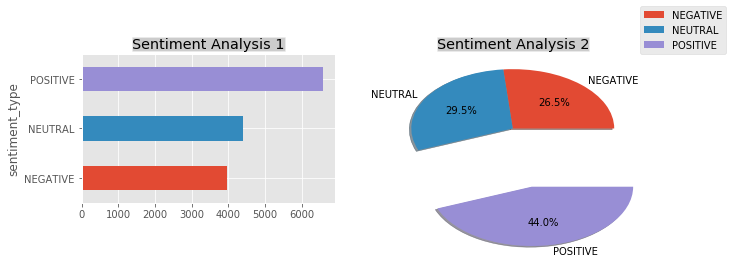

In [9]:
import matplotlib
matplotlib.style.use('ggplot')

tweets_sentiment = tweets.groupby(['sentiment_type'])['sentiment_neutral'].count()
tweets_sentiment.rename("",inplace=True)
explode = (0, 0, 1.0)
plt.subplot(221)
tweets_sentiment.transpose().plot(kind='barh',figsize=(10, 6))
plt.title('Sentiment Analysis 1', bbox={'facecolor':'0.8', 'pad':0})
plt.subplot(222)
tweets_sentiment.plot(kind='pie',figsize=(10, 6),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
plt.title('Sentiment Analysis 2', bbox={'facecolor':'0.8', 'pad':0})

# 2 What are the most famous/re-tweeted tweets?

In [10]:
np_dataFrame = tweets.loc[:,['screenName','text','isRetweet','retweetCount']]
np_populor = np_dataFrame[np.logical_and(np_dataFrame['retweetCount']>=100, np_dataFrame['isRetweet']==False)]

print(np_populor)

            screenName                                               text  \
1900       anilkohli54  Rare sight corrupt queue up to confess their c...   
2676       Joydeep_911  Calling all Nationalists to join...\r\nWalk fo...   
2940       ModiBharosa  Huge support for PM @narendramodi s #demoneti...   
4086       ModiBharosa  Putting Nation over Party Politics #nitishkuma...   
4340     gauravcsawant  Rs 40 lakh looted from a bank in Kishtwar in J...   
4375         PIB_India  Watch briefing on #Demonetization by DEA Secy ...   
6054            Joydas  Question in Narendra Modi App where PM is taki...   
6594         ashu3page  Man ends life over fund shortage ahead of daug...   
7029           ippatel  Retaining all seats of LS and state in Byelect...   
8592           5Forty3  We suspect that the positive economic impact o...   
8672           5Forty3  From Jan Dhan to Ujjwala to Neem coated Urea t...   
11104      steve_hanke  ATMs across #India running out of cash once ag...   

# 3 stacked chart (Retweets, Total Tweets) showing “‘Hour of the Day Trends” TweetCount Vs Hour

In [11]:
tweets['hour'] = pd.DatetimeIndex(tweets['created']).hour
tweets['date'] = pd.DatetimeIndex(tweets['created']).date
tweets['count'] = 1
tweets_filtered = tweets[['hour', 'date', 'count', 'retweetCount']]
tweets_filtered.head(2)

,hour,date,count,retweetCount
0,18,2016-11-23,1,331
1,18,2016-11-23,1,66


In [12]:
tweets_hourly = tweets_filtered.groupby(["hour"]).sum().reset_index()
tweets_hourly.head(2)

,hour,count,retweetCount
0,0,222,31868
1,1,307,65764


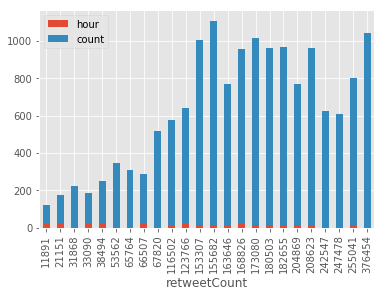

In [13]:
tweets_hourly.groupby('retweetCount').sum().plot(kind='bar',  stacked=True, )

# 4 Bar chart (Sentiment Analysis) showing percentage of emotions (trust, disgust, surprise, sadness, joy, fear, anger, anticipation) 





Text(0.5,0,"('fear', 'disgust', 'anticipation', 'sadness', 'surpris', 'anger', 'sadness', 'joy')")

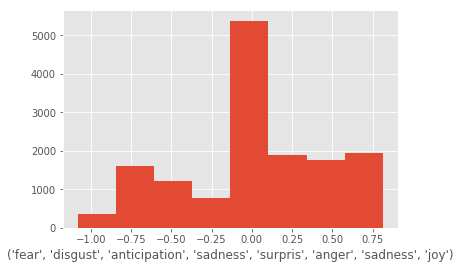

In [14]:





# create the histogram''
plt.hist(tweets.sentiment_compound_polarity,bins=8, align='left')


xlabel=('fear','disgust','anticipation','sadness','surpris','anger','sadness','joy')
plt.xlabel(xlabel)


# 5 Bar chart showing Tweet counts Device wise (twitter for Android, twitter Web client, Twitter for iPhone, Facebook, Twitter for iPad, etc.)

In [15]:
tweets['Phone_use'] = tweets['statusSource'].str.extract('([A-Za-z]+\<)', expand = False)
tweets['Phone_use'] = tweets['Phone_use'].str.extract('([A-Za-z]+)', expand = True)
tweets.Phone_use.unique() 

array(['Android', 'CPIMBadli', 'Client', nan, 'iPhone', 'Phone', 'IFTTT',
       'Facebook', 'Windows', 'TweetDeck', 'iPad', 'Hootsuite',
       'RoundTeam', 'Google', 'BlackBerry', 'com', 'i', 'SocialNewsXYZ',
       'Drivespark', 'Instagram', 'it', 'Social', 'Buffer', 'Mac', 'AI',
       'Ads', 'HubSpot', 'SocialOomph', 'Twitter', 'Peregrine',
       'NetCatNews', 'in', 'GrabInbox', 'MetroTwit', 'Widget',
       'HeaderLabs', 'LinkedIn', 'cryptohawk', 'Update', 'bitcoinagile',
       'iOS', 'IEFX', 'li', 'TwixxyBot', 'bot', 'Echofon', 'Nuzzel',
       'Junction', 'Dabr', 'RealEstateBot', 'Studio', 'Singapore', 'Buzz',
       'Lite', 'growth', 'Post', 'co', 'YoruFukurou', 'cmssocialservice',
       'TwitterTrafficMachine', 'Klout', 'trump', 'Big', 'Twitterrific',
       'App', 'SCBotBackend', 'CoSchedule', 'Integration', 'easypybot',
       'PostBeyond', 'Sprinklr', 'agileminderbot', 'Publisher', 'Quora',
       'IEHIAutoPost', 'Pluggio', 'OccuWorld', 'SocioAdvocacy', 'Edgar',
       

In [16]:
replace_words =['CPIMBadli','Facebook','SocialNewsXYZ','Instagram',
'AI','NGO','Junction', 'Dabr', 'RealEstateBot', 'Studio', 'Singapore', 'Buzz',
'TwitterTrafficMachine', 'Klout', 'trump', 'Big', 'Twitterrific','Lite','growth', 'Post', 'co', 'YoruFukurou', 'cmssocialservice','IFTTT', 'TweetDeck', 'Hootsuite', 'RoundTeam', 'Google','com', 'Drivespark', 'it', 'Social', 'Buffer','Ads', 'HubSpot','GrabInbox', 'MetroTwit', 'Widget', 'HeaderLabs', 'LinkedIn',
 'cryptohawk', 'Update', 'bitcoinagile', 'iOS', 'IEFX', 'li','TwixxyBot', 'bot', 'Echofon', 'Nuzzel', 'App', 'SCBotBackend',
 'easypybot', 'PostBeyond', 'Sprinklr', 'agileminderbot','Publisher', 'Quora', 'IEHIAutoPost', 'Pluggio', 'OccuWorld',
'SocioAdvocacy', 'Edgar', 'InvestmentWatch', 'Countdown', 'Tweets','Willow', 'Customer', 'app', 'AgendaOfEvil', 'StockmarketStar',
'BotByROP', 'salutcavaouiettoibienoubien', 'BitcoinBtcNews','retweet', 'mounds', 'VoiceStorm', 'php', 'tweethunk', 'petyushin',
'Conversocial', 'TwitBot', 'Jr', 'IT', 'SocialFlow', 'News','Peregrine', 'NetCatNews', 'in', 'CoSchedule', 'Integration',
'ebooks','SocialOomph','Twitter']


tweets['Phone_use'] = tweets['Phone_use'].replace(['Facebook'],'Facebook')
tweets['Phone_use'] = tweets['Phone_use'].replace(['iPad','Mac','i'],'Twitter for iPad')
tweets['Phone_use'] = tweets['Phone_use'].replace(['iPhone'],'Twitter for iPhone')
tweets['Phone_use'] = tweets['Phone_use'].replace(['Client','via_website'],'twitter Web client')
tweets['Phone_use'] = tweets['Phone_use'].replace(['Android'],'twitter for Android')
tweets['Phone_use'] = tweets['Phone_use'].replace([replace_words],'Other')



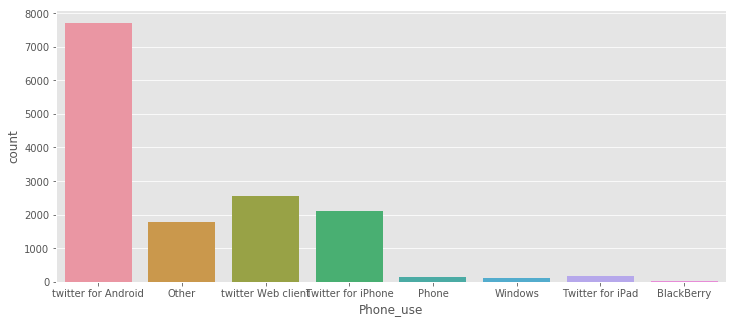

In [17]:
import seaborn as sns

plt.figure(figsize=[12,5])
sns.countplot(x='Phone_use', data= tweets)
plt.show()

# 6 Most Popular 10 User 



tweets.columns.tolist 
<bound method IndexOpsMixin.tolist of Index(['Unnamed: 0', 'X', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted',
       'sentiment_compound_polarity', 'sentiment_neutral',
       'sentiment_negative', 'sentiment_pos', 'sentiment_type', 'hour', 'date',
       'count', 'Phone_use', 'Text_os', 'yearly_rank'],
      dtype='object')

In [20]:
t1= tweets[['retweetCount','screenName']]

t1.loc[t1.groupby('screenName')['retweetCount'].idxmax()].sort_values('retweetCount', ascending=False).head(10)


,retweetCount,screenName
10109,5170,rayyat9tfoi
8693,5170,apoliceshanigm2
8182,5170,1SunnyElias
13720,5170,Krishna20977027
9358,5170,sxP6DbxfufguCc0
11397,5170,subhashjsr
9466,3754,naveennehra01
9408,3754,SurenderBalu1
9483,3754,SahilBalu456
10451,2092,AnkitSa44603749


# 7 Top 10 Users whose tweets generated most replies

In [26]:
name =['narendramodi','SushmaSwaraj','PMOIndia','RBI','arunjaitley','OfficeOfRG',
       'ArvindKejriwal','MamataOfficial','SitaramYechury','FinMinIndia','DasShaktikanta',
       'smritiirani','ShashiTharoor']
Total = []


for i in name:
    name_find = tweets[(tweets['text'] == i) & (tweets['date'])]
    name_find_total = name_find.text.count()
    Total.append(name_find_total)
    


In [27]:
new_name = []
new_total = []

for i in name:
    new_name.append(i)
for k in Total_nov:
    new_total.append(k)

dn = {'Name' : pd.Series(new_name),
    'Total_tweets': pd.Series(new_total)}
dfn = pd.DataFrame(dn)
print (dfn)

In [28]:
dn = {'Name' : pd.Series(new_name),
    'Total_tweets': pd.Series(new_total)}
dfn = pd.DataFrame(dn)
print (dfn)

              Name  Total_tweets
0     narendramodi           NaN
1     SushmaSwaraj           NaN
2         PMOIndia           NaN
3              RBI           NaN
4      arunjaitley           NaN
5       OfficeOfRG           NaN
6   ArvindKejriwal           NaN
7   MamataOfficial           NaN
8   SitaramYechury           NaN
9      FinMinIndia           NaN
10  DasShaktikanta           NaN
11     smritiirani           NaN
12   ShashiTharoor           NaN
